# 共线性数据处理
## 1.主成分分析

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as st
np.set_printoptions(suppress=True)

In [2]:
Import_data = pd.read_csv("/Users/luofeifei/study/RegressionAnalysis/All_Data/P241.txt",sep="\t")
Import_data.loc[:,:] = Import_data.loc[Import_data["YEAR"]<=59,:]
Import_data = Import_data.dropna()
Import_data.set_index("YEAR",inplace=True,drop=True)
Import_data = Import_data[["DOPROD","STOCK","CONSUM"]]

In [3]:
meanv = Import_data.apply(np.mean,axis=0)
varv = Import_data.apply(np.var,axis=0)

In [4]:
Import_data.loc[:,:] = (Import_data.values - meanv.values)/np.sqrt(varv.values)

In [5]:
corr = Import_data.corr()
corr

,DOPROD,STOCK,CONSUM
DOPROD,1.000000,0.025851,0.997261
STOCK,0.025851,1.000000,0.035673
CONSUM,0.997261,0.035673,1.000000


In [6]:
inf = np.linalg.eig(corr.values)

In [7]:
#特征值与特征向量
inf[0],inf[1]

(array([1.99915493, 0.00269089, 0.99815418]),
 array([[ 0.70633041,  0.70698208,  0.03568867],
        [ 0.04350059,  0.00697079, -0.99902908],
        [ 0.70654444, -0.7071971 ,  0.02583046]]))

In [8]:
inf[1][:,0]

array([0.70633041, 0.04350059, 0.70654444])

In [9]:
C1 = np.dot(Import_data.values,inf[1][:,0])

In [15]:
C2 = np.dot(Import_data.values,inf[1][:,2])

In [17]:
C3 = np.dot(Import_data.values,inf[1][:,1])

In [22]:
C1,C2,C3

(array([-2.22964934, -1.69794525, -1.16959756, -0.93794616, -0.67565112,
        -0.19964226,  0.37717464,  1.01923436,  1.63542429,  1.85324009,
         2.02535831]),
 array([-0.66983032, -0.58265445,  0.07654175,  0.08639036,  1.37046303,
         0.69131968,  0.77997236, -1.42014882, -1.01109953, -1.06476864,
         1.74381457]),
 array([ 0.02173374,  0.07458412,  0.0227907 , -0.01134096, -0.07612514,
        -0.02784852, -0.04486935, -0.06593076, -0.0247251 ,  0.047184  ,
         0.08454728]))

### 调包

In [19]:
from sklearn.decomposition import PCA

In [20]:
pca = PCA(n_components=3)
C = pca.fit(Import_data.values).transform(Import_data.values)

In [21]:
C

array([[ 2.22964934, -0.66983032,  0.02173374],
       [ 1.69794525, -0.58265445,  0.07458412],
       [ 1.16959756,  0.07654175,  0.0227907 ],
       [ 0.93794616,  0.08639036, -0.01134096],
       [ 0.67565112,  1.37046303, -0.07612514],
       [ 0.19964226,  0.69131968, -0.02784852],
       [-0.37717464,  0.77997236, -0.04486935],
       [-1.01923436, -1.42014882, -0.06593076],
       [-1.63542429, -1.01109953, -0.0247251 ],
       [-1.85324009, -1.06476864,  0.047184  ],
       [-2.02535831,  1.74381457,  0.08454728]])

## 2.主成分回归

In [78]:
Import_data = pd.read_csv("/Users/luofeifei/study/RegressionAnalysis/All_Data/P241.txt",sep="\t")
Import_data.loc[:,:] = Import_data.loc[Import_data["YEAR"]<=59,:]
Import_data = Import_data.dropna()
Import_data.set_index("YEAR",inplace=True,drop=True)

In [79]:
Import_data.head()

,IMPORT,DOPROD,STOCK,CONSUM
YEAR,,,,
49.0,15.9,149.3,4.2,108.1
50.0,16.4,161.2,4.1,114.8
51.0,19.0,171.5,3.1,123.2
52.0,19.1,175.5,3.1,126.9
53.0,18.8,180.8,1.1,132.1


In [384]:
X = Import_data[["DOPROD","STOCK","CONSUM"]].values
Y = Import_data.IMPORT.values

In [385]:
sy = np.sqrt(Y.var()*len(Y))
sx = np.sqrt(X.var(axis=0)*len(Y))
ymean = Y.mean()
xmean = X.mean(axis=0)

In [386]:
#主成分：可单位化，可标准化
#岭回归：只能单位化，因为单位化的相关系数矩阵刚好等于Z.T*Z，标准化就错了
#单位化和标准化都不影响相关系数，但影响协方差，单位化协方差小于1正好等于相关系数，标准化的协方差一般与相关系数差一个常数倍
X = (X - xmean)/sx
Y = (Y - ymean)/sy

In [331]:
#协方差矩阵
cor = np.corrcoef(X.T)

In [332]:
#特征值与特征向量,按小到大的顺序排列
eigh = np.linalg.eigh(cor)
C = np.dot(X,eigh[1])

In [333]:
np.linalg.eig(cor)

(array([1.99915493, 0.00269089, 0.99815418]),
 array([[ 0.70633041,  0.70698208,  0.03568867],
        [ 0.04350059,  0.00697079, -0.99902908],
        [ 0.70654444, -0.7071971 ,  0.02583046]]))

### 只有一个主成分

In [334]:
#一个主成分的模型
model_10_29 = sm.OLS(Y,C[:,2]).fit()
print(model_10_29.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.952
Model:                            OLS   Adj. R-squared (uncentered):              0.947
Method:                 Least Squares   F-statistic:                              197.2
Date:                Mon, 14 Sep 2020   Prob (F-statistic):                    6.57e-08
Time:                        16:45:56   Log-Likelihood:                          14.252
No. Observations:                  11   AIC:                                     -26.50
Df Residuals:                      10   BIC:                                     -26.11
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/Users/luofeifei/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


(array([ 0.04689834, -0.02891727,  0.04212008,  0.00088767, -0.07455876,
        -0.06223045, -0.02215575,  0.10874222,  0.09190761,  0.01179504,
        -0.11448872]),
 array([ 0.67515115, -0.41629464,  0.60636308,  0.01277893, -1.0733521 ,
        -0.89587307, -0.31895549,  1.56545902,  1.32310715,  0.16980199,
        -1.64818602]))

In [335]:
#将其化为标准化的模型
a = np.array([0,0,model_10_29.params.item()]).reshape(-1,1)
theta = np.dot(eigh[1],a)

In [336]:
a

array([[ 0.        ],
       [ 0.        ],
       [-0.68998209]])

In [337]:
#只有一个主成分的标准化模型的theta值
theta

array([[0.48735534],
       [0.03001463],
       [0.48750301]])

* 要注意顺序！！因为X的协方差矩阵排列顺序（乱序，不一定按特征值大小排列，需要用eigh函数，特征向量按特征值从小到大排列）与C1，C2，C3的排列顺序（按照特征值从大到小排列）不一致。a的顺序必须和C的顺序一致，即a[0],a[1],a[2]的值必须对应到主成分Ci的值，上述分析中，C3是最大的主成分，从而a[2]是该主成分回归的系数值,a[0],a[1]取0

### 两个主成分

In [338]:
model_10_30 = sm.OLS(Y,C[:,1:]).fit()
print(model_10_30.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                              379.4
Date:                Mon, 14 Sep 2020   Prob (F-statistic):                    2.04e-09
Time:                        16:45:58   Log-Likelihood:                          22.035
No. Observations:                  11   AIC:                                     -40.07
Df Residuals:                       9   BIC:                                     -39.27
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/Users/luofeifei/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


In [339]:
a2 = [0,model_10_30.params[0].item(),model_10_30.params[1].item()]
a2 = np.array(a2).reshape(-1,1)

In [340]:
theta2 = np.dot(eigh[1],a2)

In [341]:
theta2

array([[0.48052797],
       [0.22113231],
       [0.48256156]])

In [342]:
#换成非标准化的系数
beta = np.multiply((sy/sx).reshape(-1,1),theta2)
beta

array([[0.07277981],
       [0.60922012],
       [0.10625939]])

In [343]:
beta0 = ymean - np.dot(xmean,beta)

In [344]:
beta0

array([-9.13010782])

# 3.约束条件

In [345]:
#C3 = 0的等价与给原模型加的约束条件：beta1 = 0.69beta2
sx[2]/sx[0]

0.6878245160877823

# 4.岭回归

In [404]:
def beta(Y,X,k):
    L0 = np.dot(X.T,X)
    L1 = L0+k*np.diag(np.ones(X.shape[1]))
    L2 = np.linalg.inv(L1)
    L3 = np.dot(L2,X.T)
    ans = np.dot(L3,Y).reshape(-1,1)
    return ans

test1 = beta(Y,X,0)

In [405]:
result = test1
for k in np.arange(0.001,1.001,0.001):
    result = np.hstack((result,beta(Y,X,k)))

### 岭迹图

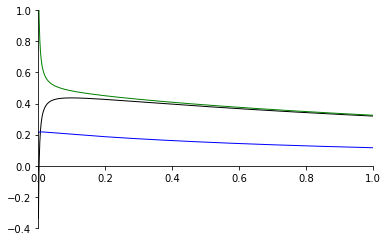

In [406]:
n = np.arange(0,1.001,0.001)
plt.plot(n,result[0,:],'k',linewidth=1.0)
plt.plot(n,result[1,:],'b',linewidth=1.0)
plt.plot(n,result[2,:],'g',linewidth=1.0)
plt.xlim(0, 1)
plt.ylim(-0.4,1)
ax = plt.gca()
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))
for key, spine in ax.spines.items():
    # 'left', 'right', 'bottom', 'top'
    if key == 'right' or key == 'top':
        spine.set_visible(False)
plt.show()

In [407]:
result[0,:]

array([-0.33934263, -0.11744584,  0.00974265, ...,  0.31945596,
        0.31935144,  0.31924699])

In [408]:
result[1,:]

array([0.21304844, 0.21503238, 0.21608289, ..., 0.11556477, 0.11551026,
       0.11545581])

### 挑选k值

In [393]:
beta0 = result[:,0]
resid = Y - np.dot(X,beta0)
sigma0 = sum(resid**2)/(len(resid)-3)

In [394]:
sigma0

0.0010129309930369441

In [395]:
k0 = 3*sigma0/sum(beta0**2)
k0

0.00163593900727845

In [396]:
sum(resid**2)
#书上用的是标准化数据做的后序分析，但是岭回归是使用单位化数据得出来的结果。。。书上似乎有错

0.008103447944295553

In [416]:
b = beta(Y,X,0.04)

In [418]:
b

array([[0.41955305],
       [0.21267025],
       [0.52488286]])

In [417]:
#beta1
sy/sx[0]*b[0]

array([0.06354467])

In [442]:
#beta2
sy/sx[1]*b[1]

array([0.58590713])

### 调包

In [419]:
from sklearn.linear_model import Ridge,RidgeCV

In [439]:
model = Ridge(alpha=0.04,normalize=True)

In [460]:
model.fit(Import_data[["DOPROD","STOCK","CONSUM"]].values,Import_data.IMPORT.values)

Ridge(alpha=0.04, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [464]:
model.intercept_

-8.5583165975305

In [ ]:
#这个包没有计算VIFk、SSEk、岭迹图的功能，需要自己写函数。。。。bad。。。